# Histogramming
Spark>=4.0.0では、データフレームを直接プロットする関数が追加されたが、ヒストグラムのビン設定をROOTっぽくできるように`hist/`に関数を定義したので、紹介する。

## 事前準備
プロット用のモジュールをインストールする。sparkデフォルトのplotは"Plotly"、`hist/`関数は"matplotlib"が必要。
一度jupyter notebookを閉じて
```
conda install matplotlib plotly
```
また、histモジュールを使うために`$PYTHONPATH`を定義する。
```
source ./setup.sh
```
以上を実行したらnotebookを立ち上げなおす。

## ファイルを開く

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

spark = SparkSession.builder.getOrCreate()
df = spark.read.parquet("./data/clover_caldata.parquet")
df.show(5)

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/10/08 17:16:01 WARN Utils: Your hostname, TABLET-S9I8ER9S, resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
25/10/08 17:16:01 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/08 17:16:02 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+-------------+---+-----+------------------+
|           ts| ch|  cfd|           adc_cal|
+-------------+---+-----+------------------+
|7296321907778|  4| 8485|1173.5435834050113|
|7296321978243|  2| 9278|227.55610453923023|
|7296321997358|  1| 8225|448.58882035985226|
|7296322069363|  0|16234|0.2826225528521701|
|7296322214400|  4|24255| 1333.927759363862|
+-------------+---+-----+------------------+
only showing top 5 rows


## Sparkのplot機能を使う
- plot.hist(): データフレームの列に対してヒストグラムをプロットする。

25/10/08 17:16:10 WARN HintErrorLogger: Hint (strategy=broadcast) is not supported in the query: build left for left outer join.
25/10/08 17:16:14 WARN HintErrorLogger: Hint (strategy=broadcast) is not supported in the query: build left for left outer join.
                                                                                

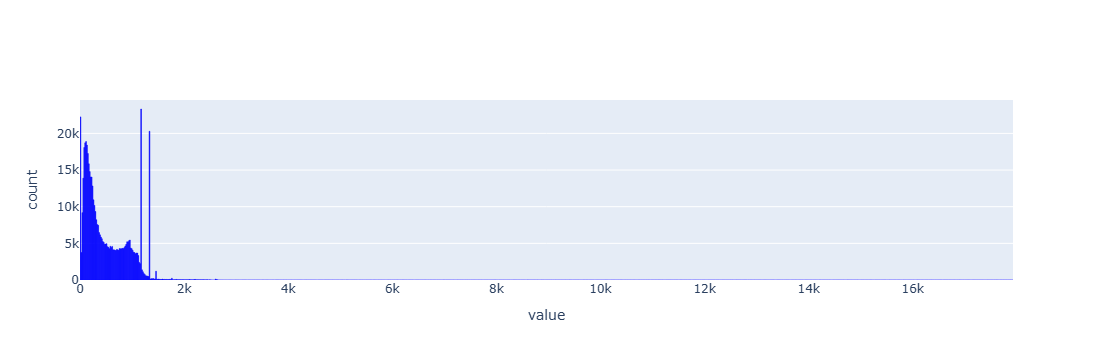

In [2]:
fig = df.select("adc_cal").plot.hist(bins=1000)
fig.update_traces(marker_color="blue", marker_line_color="blue")
fig.show()

## histモジュールを使う
Sparkを使ってヒストグラムをプロットする用に、Hist1D()、Hist2D()関数を用意した。
matplotlibを使っているのでスタイルはそちらで変更。
返り値はヒストグラムのnumpy array

Total entries: 522132, Underflow: 303, Inside: 520317, Overflow: 1512


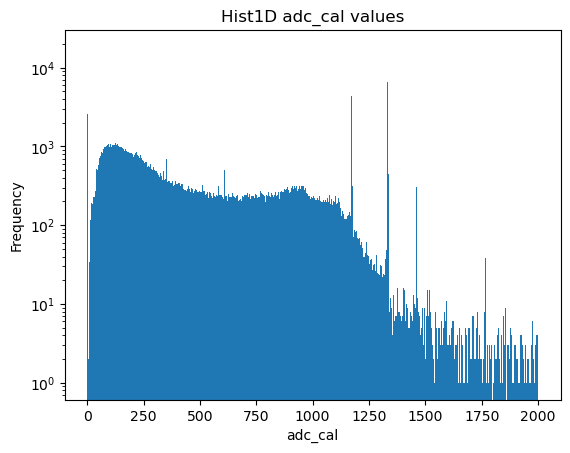

(array([5.00250125e-01, 1.50075038e+00, 2.50125063e+00, ...,
       1.99749875e+03, 1.99849925e+03, 1.99949975e+03]), array([1.8357e+04, 2.6090e+03, 1.0800e+02, ..., 4.0000e+00, 2.0000e+00,
       1.0000e+00]))


In [3]:
from hist.sparkHist1d import Hist1D
from matplotlib import pyplot as plt

h_data = Hist1D(df, "adc_cal", 2000, [0,2000])
plt.yscale("log")
plt.show()
print(h_data)

Statistics:
[[0.00000e+00 0.00000e+00 0.00000e+00]
 [3.03000e+02 5.20014e+05 1.51200e+03]
 [0.00000e+00 0.00000e+00 0.00000e+00]]


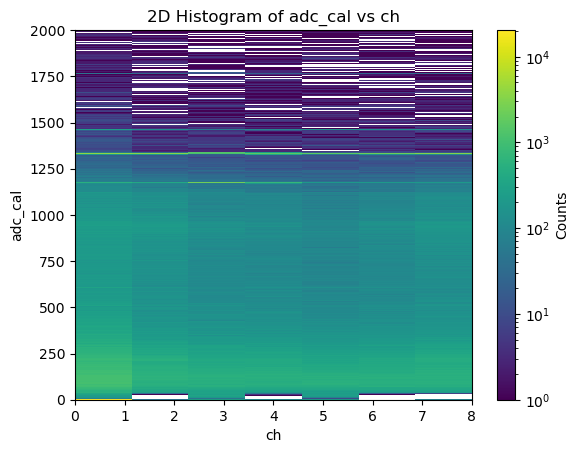

In [4]:
from hist.sparkHist2d import Hist2D
from matplotlib.colors import LogNorm

h2d_data = Hist2D(df, ["ch","adc_cal"], [8,500],[[0,8],[0,2000]], interpolation='none', norm=LogNorm())